In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

energy = pd.read_csv('energy_dataset.csv')
weather = pd.read_csv('weather_features.csv')

energy.head(5)

# Energy data preprocessing

In [27]:
print(energy.shape)

(35064, 29)


In [29]:
print(energy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

Since the energy generation is based on the forecast, and the price is based on generation, it has nothing to do with actual load. All the columns will be drop except 'time'and 'actual load'

In [31]:
Energy = energy.iloc[:,[0,26]]
Energy

,time,total load actual
0,2015-01-01 00:00:00+01:00,25385.0
1,2015-01-01 01:00:00+01:00,24382.0
2,2015-01-01 02:00:00+01:00,22734.0
3,2015-01-01 03:00:00+01:00,21286.0
4,2015-01-01 04:00:00+01:00,20264.0
...,...,...
35059,2018-12-31 19:00:00+01:00,30653.0
35060,2018-12-31 20:00:00+01:00,29735.0
35061,2018-12-31 21:00:00+01:00,28071.0
35062,2018-12-31 22:00:00+01:00,25801.0


The format of time is too complicated, changing the format to "2015-01-01 00:00" 

In [32]:
Energy.time = Energy.time.apply(lambda x: x[0:16])
Energy

F:\Jupiter\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,time,total load actual
0,2015-01-01 00:00,25385.0
1,2015-01-01 01:00,24382.0
2,2015-01-01 02:00,22734.0
3,2015-01-01 03:00,21286.0
4,2015-01-01 04:00,20264.0
...,...,...
35059,2018-12-31 19:00,30653.0
35060,2018-12-31 20:00,29735.0
35061,2018-12-31 21:00,28071.0
35062,2018-12-31 22:00,25801.0



There is no null value in time column. However, there is null avalue in load column


In [33]:

null0=list(Energy.loc[pd.isna(Energy['time']), :].index)
null1=list(Energy.loc[pd.isna(Energy['total load actual']), :].index)
print(null0)
print(null1)
print(Energy.iloc[: , 1].max())
print(Energy.iloc[: , 1].min())
replace = Energy.iloc[: , 1].mean()
print(replace)


[]
[108, 109, 110, 111, 112, 113, 661, 751, 752, 753, 756, 757, 758, 759, 760, 761, 762, 763, 2258, 2528, 2623, 2708, 2913, 3554, 6583, 6586, 8049, 11524, 11526, 11902, 13341, 15272, 25164, 25171, 30185, 30896]
41015.0
18041.0
28696.93990521868



Plot the box plot as we can see, there is no outlier, and also it is kind of normal distribution, no significant skew to any side. Thus we will relace the null value by mean


[(15000, 42000)]

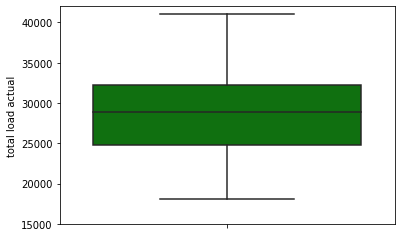

In [34]:
#oops, there is no outlier, so nice!
ax = sns.boxplot(y = 'total load actual', data = Energy, color = 'green')
ax.set(ylim = (15000, 42000))


Replace all the missing value with mean "28696.939905"

In [35]:
energydata = Energy
energydata['total load actual'].fillna(replace, inplace = True)
energydata['total load actual'][null1]


F:\Jupiter\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


108      28696.939905
109      28696.939905
110      28696.939905
111      28696.939905
112      28696.939905
113      28696.939905
661      28696.939905
751      28696.939905
752      28696.939905
753      28696.939905
756      28696.939905
757      28696.939905
758      28696.939905
759      28696.939905
760      28696.939905
761      28696.939905
762      28696.939905
763      28696.939905
2258     28696.939905
2528     28696.939905
2623     28696.939905
2708     28696.939905
2913     28696.939905
3554     28696.939905
6583     28696.939905
6586     28696.939905
8049     28696.939905
11524    28696.939905
11526    28696.939905
11902    28696.939905
13341    28696.939905
15272    28696.939905
25164    28696.939905
25171    28696.939905
30185    28696.939905
30896    28696.939905
Name: total load actual, dtype: float64

Save the data as csv for future ML (Time Series)

In [36]:

energydata.to_csv('energydata.csv')


Since the energy demand is highly based on different time period. For instance, people use more electricity during the night hours and less during the day hours. Thus it is worth to try to  predict the hour energy demand base on the same hour of the past days. In order to do that, the shape of the data has to be transformed. The Row becomes to the date and hour becomes to the column (from hour 0 to hour 23)

In [157]:
data = pd.read_csv('energydata.csv', index_col=[0], parse_dates=True)
dates = pd.date_range(start='2014-12-31T2300', end='2018-12-31T2200', freq='H')
data.index = pd.DatetimeIndex(dates).tz_localize('UTC').tz_convert('Europe/Madrid')
df = data['total load actual']

def transform(X):
    df = pd.DataFrame()

    start = X.index.min()
    end = X.index.max()
    
    df['year'] = X.index.year
    df['month'] = X.index.month
    df['day'] = X.index.day
    df['hours'] = X.index.hour
    df['Total_loads'] = X.values
    
    df = df.set_index(['year', 'month', 'day', 'hours'], append=True).unstack()
    df = df.groupby(['year', 'month', 'day']).sum()
    
    df.reset_index(inplace=True)
    df.drop(['year', 'month', 'day'], axis=1, inplace=True)
    
    date = pd.date_range(start=start, end=end, freq='D').strftime('%Y-%m-%d')
    
    df.index = pd.DatetimeIndex(date, name='date')
    
    return df

day_energy = transform(df)
day_energy.to_csv('day_energy.csv')
day_energy.head()

F:\Jupiter\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Total_loads                                                        \
hours               0        1        2        3        4        5        6    
date                                                                           
2015-01-01     25385.0  24382.0  22734.0  21286.0  20264.0  19905.0  20010.0   
2015-01-02     27070.0  24935.0  23214.0  22540.0  22096.0  22066.0  22275.0   
2015-01-03     25564.0  23584.0  22194.0  21296.0  21145.0  21316.0  21674.0   
2015-01-04     25254.0  23620.0  22606.0  22191.0  21929.0  22195.0  24035.0   
2015-01-05     25069.0  23390.0  21988.0  21182.0  20778.0  20309.0  20252.0   

                                       ...                              \
hours            7        8        9   ...            14            15   
date                                   ...                               
2015-01-01  20377.0  20094.0  20637.0  ...  24672.000000  23528.000000   
2015-01-02  23025.0  23699.0  25834.0  ...  29241.000000  27973.000000   
2015-01-03  22127.0  22756.0  24654.0  ...  26416.000000  25362.000000   
2015-01-04  26807.0  28316.0  29871.0  ...  28741.000000  28249.000000   
2015-01-05  19964.0  20796.0  22478.0  ...  28696.939905  28696.939905   

                                                                            \
hours                 16            17       18       19       20       21   
date                                                                         
2015-01-01  23118.000000  23606.000000  26447.0  28020.0  29014.0  29571.0   
2015-01-02  27320.000000  27157.000000  29045.0  31967.0  33266.0  33668.0   
2015-01-03  24770.000000  24501.000000  24992.0  27964.0  29694.0  29874.0   
2015-01-04  28105.000000  27908.000000  27577.0  27418.0  28604.0  30346.0   
2015-01-05  28696.939905  28696.939905  21888.0  22048.0  22858.0  25604.0   

                              
hours            22       23  
date                          
2015-01-01  29031.0  26798.0  
2015-01-02  32426.0  29705.0  
2015-01-03  28979.0  26863.0  
2015-01-04  28190.0  26270.0  
2015-01-05  25381.0  23822.0  

[5 rows x 24 columns]

Save the transform data to csv and save each hour data to csv (torally 24)

In [154]:
day_energy.to_csv('day_energy.csv')

In [159]:
day_energy0 = day_energy.iloc[: , 0]
day_energy0.to_csv('day_energy0.csv')
day_energy1 = day_energy.iloc[: , 1]
day_energy1.to_csv('day_energy1.csv')
day_energy2 = day_energy.iloc[: , 2]
day_energy2.to_csv('day_energy2.csv')
day_energy3 = day_energy.iloc[: , 3]
day_energy3.to_csv('day_energy3.csv')
day_energy4 = day_energy.iloc[: , 4]
day_energy4.to_csv('day_energy4.csv')
day_energy5 = day_energy.iloc[: , 5]
day_energy5.to_csv('day_energy5.csv')
day_energy6 = day_energy.iloc[: , 6]
day_energy6.to_csv('day_energy6.csv')
day_energy7 = day_energy.iloc[: , 7]
day_energy7.to_csv('day_energy7.csv')
day_energy8 = day_energy.iloc[: , 8]
day_energy8.to_csv('day_energy8.csv')
day_energy9 = day_energy.iloc[: , 9]
day_energy9.to_csv('day_energy9.csv')
day_energy10 = day_energy.iloc[: , 10]
day_energy10.to_csv('day_energy10.csv')
day_energy11 = day_energy.iloc[: , 11]
day_energy11.to_csv('day_energy11.csv')
day_energy12 = day_energy.iloc[: , 12]
day_energy12.to_csv('day_energy12.csv')
day_energy13 = day_energy.iloc[: , 13]
day_energy13.to_csv('day_energy13.csv')
day_energy14 = day_energy.iloc[: , 14]
day_energy14.to_csv('day_energy14.csv')
day_energy15 = day_energy.iloc[: , 15]
day_energy15.to_csv('day_energy15.csv')
day_energy16 = day_energy.iloc[: , 16]
day_energy16.to_csv('day_energy16.csv')
day_energy17 = day_energy.iloc[: , 17]
day_energy17.to_csv('day_energy17.csv')
day_energy18 = day_energy.iloc[: , 18]
day_energy18.to_csv('day_energy18.csv')
day_energy19 = day_energy.iloc[: , 19]
day_energy19.to_csv('day_energy19.csv')
day_energy20 = day_energy.iloc[: , 20]
day_energy20.to_csv('day_energy20.csv')
day_energy21 = day_energy.iloc[: , 21]
day_energy21.to_csv('day_energy21.csv')
day_energy22 = day_energy.iloc[: , 22]
day_energy22.to_csv('day_energy22.csv')
day_energy23 = day_energy.iloc[: , 23]
day_energy23.to_csv('day_energy23.csv')




# Weather data preprocessing

In [42]:
print(weather.shape)

(178396, 17)


In [43]:
print(weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [44]:
weather.head(5)

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


As we can see, "temp_min" and "temp_max" are basically identical to "temp", they are redundancy. So as "weather_main", "weather_description"
and "weather_icon"  We will drop "temp_min", "temp_max", "weather_main", "weather_description" and "weather_icon" 

In [79]:
Weather = weather.drop(['temp_min' , 'temp_max' , 'weather_main' ,'weather_description' , 'weather_icon'], axis = 1)
Weather.head(5)

,dt_iso,city_name,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
0,2015-01-01 00:00:00+01:00,Valencia,270.475,1001,77,1,62,0.0,0.0,0.0,0,800
1,2015-01-01 01:00:00+01:00,Valencia,270.475,1001,77,1,62,0.0,0.0,0.0,0,800
2,2015-01-01 02:00:00+01:00,Valencia,269.686,1002,78,0,23,0.0,0.0,0.0,0,800
3,2015-01-01 03:00:00+01:00,Valencia,269.686,1002,78,0,23,0.0,0.0,0.0,0,800
4,2015-01-01 04:00:00+01:00,Valencia,269.686,1002,78,0,23,0.0,0.0,0.0,0,800


As we can see, "temp_min" and "temp_max" are basically identical to "temp", they are redundancy. So as "weather_main", "weather_description"
and "weather_icon"  We will drop "temp_min", "temp_max", "weather_main", "weather_description" and "weather_icon" 

In [80]:
Weather.rename(columns={'dt_iso':'time'}, inplace = True)
Weather.time = Weather.time.apply(lambda x: x[0:16])
Weather.head(5)

,time,city_name,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
0,2015-01-01 00:00,Valencia,270.475,1001,77,1,62,0.0,0.0,0.0,0,800
1,2015-01-01 01:00,Valencia,270.475,1001,77,1,62,0.0,0.0,0.0,0,800
2,2015-01-01 02:00,Valencia,269.686,1002,78,0,23,0.0,0.0,0.0,0,800
3,2015-01-01 03:00,Valencia,269.686,1002,78,0,23,0.0,0.0,0.0,0,800
4,2015-01-01 04:00,Valencia,269.686,1002,78,0,23,0.0,0.0,0.0,0,800


There is no null

In [81]:
#There is no null, so nice!
null2=list(Weather.loc[pd.isna(Weather['time']), :].index)
null3=list(Weather.loc[pd.isna(Weather['city_name']), :].index)
null4=list(Weather.loc[pd.isna(Weather['temp']), :].index)
null5=list(Weather.loc[pd.isna(Weather['pressure']), :].index)
null6=list(Weather.loc[pd.isna(Weather['humidity']), :].index)
null7=list(Weather.loc[pd.isna(Weather['wind_speed']), :].index)
null8=list(Weather.loc[pd.isna(Weather['wind_deg']), :].index)
null9=list(Weather.loc[pd.isna(Weather['rain_1h']), :].index)
null10=list(Weather.loc[pd.isna(Weather['rain_3h']), :].index)
null11=list(Weather.loc[pd.isna(Weather['snow_3h']), :].index)
null12=list(Weather.loc[pd.isna(Weather['clouds_all']), :].index)
null13=list(Weather.loc[pd.isna(Weather['weather_id']), :].index)
print(null2)
print(null3)
print(null4)
print(null5)
print(null6)
print(null7)
print(null8)
print(null9)
print(null10)
print(null11)
print(null12)
print(null13)


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


Just try out, we will do all after take average and merged data

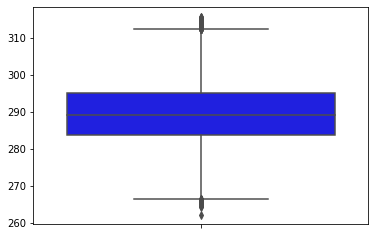

In [82]:
ax = sns.boxplot(y = ['temp'], data = Weather, color = 'blue')

In [83]:
Weather['city_name'].describe()


count     178396
unique         5
top       Madrid
freq       36267
Name: city_name, dtype: object

In [84]:
Weather['city_name'].value_counts()

Madrid        36267
Bilbao        35951
Seville       35557
 Barcelona    35476
Valencia      35145
Name: city_name, dtype: int64

In [85]:
Weather.city_name.replace(' Barcelona', 'Barcelona', inplace = True)

As we can see, they are 5 citys in weather data. However, the energy data is TOTAL load. We have to take the weight average of all the 
attribute based on the city population 

In [86]:
city_population = { 'Valencia': 2522383,
                    'Madrid': 6791667,
                    'Bilbao':1037847,
                    'Barcelona': 5474482,
                    'Seville': 1519639}
def city_weight (x):
  total = 0
  for i in x.values():
    total += i
  for c, i in x.items():
    x[c] = i/total
  return x
city_weight = city_weight(city_population)
city_weight

{'Valencia': 0.14541567984075654,
 'Madrid': 0.3915404100237876,
 'Bilbao': 0.05983200294153967,
 'Barcelona': 0.31560453817123907,
 'Seville': 0.08760736902267714}

Take the average and save the data to csv

In [87]:

w = []
for c in city_weight.items():
# c[0] city name . c[1] city weight
  print(c[0], c[1])
  w.append(Weather[Weather['city_name'] == c[0]][
                                                 ['temp','pressure','humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 
                                                  'clouds_all','weather_id']]*c[1])
r = pd.concat(w)
r.insert(0, "time", Weather.time, True)
r.insert(1, "city_name", Weather.city_name, True)

result = {'Time':[], 'temp':[], 'pressure':[], 'humidity':[], 'wind_speed':[], 'wind_deg':[], 'rain_1h':[], 'rain_3h':[], 'snow_3h':[], 
          'clouds_all':[], 'weather_id':[]}

for i in range(1, len(Weather)):
  Time = r[i-1:i].time.to_string(index=False).strip()
  if ( Time == '2018-12-31 23:00'):
    break
  if (r[r['time'] == Time].city_name.count() == 5):
    a = r[r['time'] == Time][
                              ['temp','pressure','humidity','wind_speed','wind_deg','rain_1h','rain_3h','snow_3h','clouds_all','weather_id']
                              ].sum()
    result['Time'].append(Time)
    result['temp'].append(a[0])
    result['pressure'].append(a[1])
    result['humidity'].append(a[2])
    result['wind_speed'].append(a[3])
    result['wind_deg'].append(a[4])
    result['rain_1h'].append(a[5])
    result['rain_3h'].append(a[6])
    result['snow_3h'].append(a[7])
    result['clouds_all'].append(a[8])
    result['weather_id'].append(a[9])
    

weather_averaged = pd.DataFrame(result, columns =['Time','temp','pressure','humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h',
                                                  'snow_3h', 'clouds_all', 'weather_id'])

weather_averaged.to_csv('weather_averaged.csv')

Valencia 0.14541567984075654
Madrid 0.3915404100237876
Bilbao 0.05983200294153967
Barcelona 0.31560453817123907
Seville 0.08760736902267714


In [94]:
weatherAve = pd.read_csv('weather_averaged.csv', index_col=[0], parse_dates=True)
weatherAve.head(25)

,Time,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
0,2015-01-01 00:00,272.965776,1005.407542,79.798764,2.833795,163.668609,0.0,0.0,0.0,0.000000,800.000000
1,2015-01-01 01:00,272.972129,1005.347710,79.798764,2.833795,163.848105,0.0,0.0,0.0,0.000000,800.000000
2,2015-01-01 02:00,272.336108,1005.868562,79.985291,2.923426,141.151878,0.0,0.0,0.0,0.000000,800.000000
3,2015-01-01 03:00,272.333215,1005.808730,79.985291,2.923426,141.211710,0.0,0.0,0.0,0.000000,800.000000
4,2015-01-01 04:00,272.350097,1005.808730,79.985291,2.923426,140.972382,0.0,0.0,0.0,0.000000,800.000000
5,2015-01-01 05:00,271.923279,1006.806707,79.843455,2.279116,169.143466,0.0,0.0,0.0,0.000000,800.000000
6,2015-01-01 06:00,271.933570,1006.806707,79.843455,2.279116,169.023802,0.0,0.0,0.0,0.000000,800.000000
7,2015-01-01 07:00,272.019788,1006.866539,79.723790,2.279116,169.023802,0.0,0.0,0.0,0.000000,800.000000
8,2015-01-01 08:00,273.923400,1008.285854,79.865844,1.403212,300.774455,0.0,0.0,0.0,0.000000,800.000000
9,2015-01-01 09:00,273.984309,1008.285854,79.806012,1.403212,300.714623,0.0,0.0,0.0,0.000000,800.000000


weather_id is categarical, need to be rounded to interger

In [95]:

weatherAve.weather_id = weather_averaged.weather_id.round(decimals=0)
weatherAve.weather_id.head(30)

0     800.0
1     800.0
2     800.0
3     800.0
4     800.0
5     800.0
6     800.0
7     800.0
8     800.0
9     800.0
10    800.0
11    800.0
12    800.0
13    800.0
14    800.0
15    800.0
16    800.0
17    800.0
18    800.0
19    800.0
20    800.0
21    800.0
22    800.0
23    800.0
24    800.0
25    800.0
26    800.0
27    800.0
28    800.0
29    800.0
Name: weather_id, dtype: float64

# Merge the energy data and weather data 

In [97]:
#merge the weather_average data with energydata
weatherAve = weatherAve.rename(columns={'Time' : 'time'})
mergedata = pd.merge(energydata, weatherAve, on = 'time')
mergedata.to_csv('mergedata.csv')
mergedata.head(5)

,time,total load actual,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
0,2015-01-01 00:00,25385.0,272.965776,1005.407542,79.798764,2.833795,163.668609,0.0,0.0,0.0,0.0,800.0
1,2015-01-01 01:00,24382.0,272.972129,1005.347710,79.798764,2.833795,163.848105,0.0,0.0,0.0,0.0,800.0
2,2015-01-01 02:00,22734.0,272.336108,1005.868562,79.985291,2.923426,141.151878,0.0,0.0,0.0,0.0,800.0
3,2015-01-01 03:00,21286.0,272.333215,1005.808730,79.985291,2.923426,141.211710,0.0,0.0,0.0,0.0,800.0
4,2015-01-01 04:00,20264.0,272.350097,1005.808730,79.985291,2.923426,140.972382,0.0,0.0,0.0,0.0,800.0


# Feature selection through correlation check

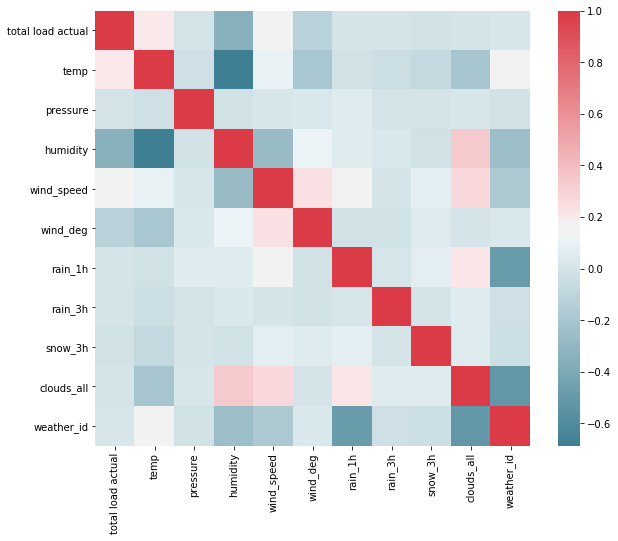

In [98]:

f, ax = plt.subplots(figsize=(10, 8))
corr = mergedata.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [99]:
corr.style.background_gradient(cmap='coolwarm')


,total load actual,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
total load actual,1.000000,0.202246,-0.002148,-0.347375,0.164687,-0.122529,0.000781,0.002062,-0.010398,0.004563,0.017780
temp,0.202246,1.000000,-0.021456,-0.686569,0.090993,-0.194316,-0.014055,-0.039096,-0.077330,-0.209813,0.135084
pressure,-0.002148,-0.021456,1.000000,-0.014374,0.014415,0.025704,0.052015,-0.002820,-0.001362,0.017117,-0.013798
humidity,-0.347375,-0.686569,-0.014374,1.000000,-0.274399,0.116643,0.052628,0.031450,-0.008106,0.338380,-0.256200
wind_speed,0.164687,0.090993,0.014415,-0.274399,1.000000,0.232160,0.131028,-0.001283,0.064676,0.269285,-0.184951
wind_deg,-0.122529,-0.194316,0.025704,0.116643,0.232160,1.000000,-0.012823,-0.010255,0.048109,0.005005,0.026801
rain_1h,0.000781,-0.014055,0.052015,0.052628,0.131028,-0.012823,1.000000,0.005582,0.069863,0.210640,-0.487452
rain_3h,0.002062,-0.039096,-0.002820,0.031450,-0.001283,-0.010255,0.005582,1.000000,-0.000744,0.051331,-0.026365
snow_3h,-0.010398,-0.077330,-0.001362,-0.008106,0.064676,0.048109,0.069863,-0.000744,1.000000,0.056990,-0.033278
clouds_all,0.004563,-0.209813,0.017117,0.338380,0.269285,0.005005,0.210640,0.051331,0.056990,1.000000,-0.517852


After checking the correlation graph, only "temp", "humidity" and "wind3_speed" will be used, others are all extremely weak correlated
to total actual load. We need to drop all the feature that we dont need

In [106]:
merged = mergedata[['time', 'temp' , 'humidity' , 'wind_speed', 'total load actual']]
merged.head(5)


,time,temp,humidity,wind_speed,total load actual
0,2015-01-01 00:00,272.965776,79.798764,2.833795,25385.0
1,2015-01-01 01:00,272.972129,79.798764,2.833795,24382.0
2,2015-01-01 02:00,272.336108,79.985291,2.923426,22734.0
3,2015-01-01 03:00,272.333215,79.985291,2.923426,21286.0
4,2015-01-01 04:00,272.350097,79.985291,2.923426,20264.0


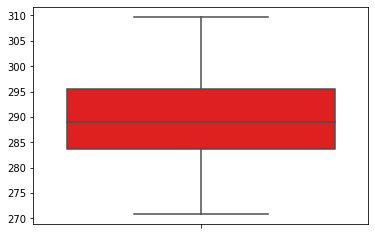

In [108]:
ax = sns.boxplot(y = ['temp'], data = merged, color = 'red')

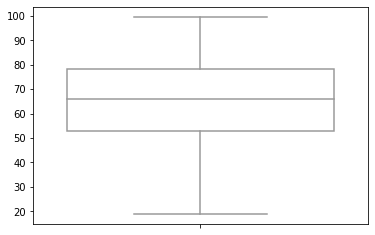

In [110]:
ax = sns.boxplot(y = ['humidity'], data = merged, color = 'white')

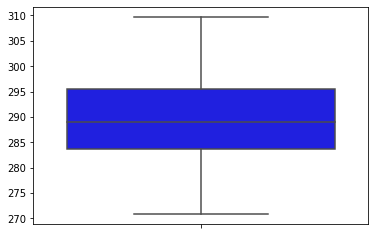

In [111]:
ax = sns.boxplot(y = ['temp'], data = merged, color = 'blue')

There is no outlier after taking weighted average

In [112]:
mergedML = merged
mergedML.to_csv('mergedML.csv')